In [4]:
csv_file_path = r"D:\ML\MLOps_house_price_project\housing\artifact\data_ingestion\2025-02-23-11-46-09\raw_data\housing.csv"

In [5]:
import pandas as pd

In [11]:
housing_data_frame = pd.read_csv(csv_file_path)

In [12]:
housing_data_frame['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [9]:
pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
Us

In [29]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

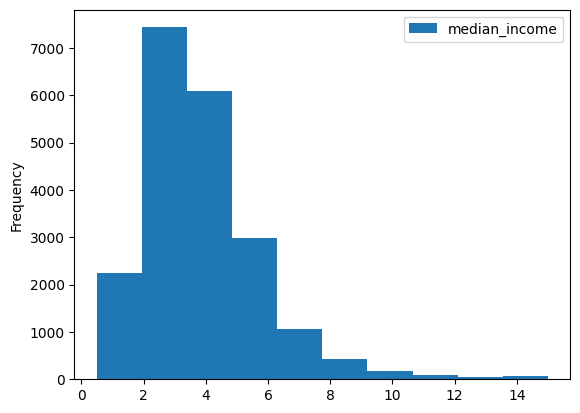

In [17]:
housing_data_frame[['median_income']].plot(kind='hist')

In [18]:
import numpy as np

In [19]:
housing_data_frame["income_cat"] = pd.cut(
                housing_data_frame["median_income"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [20]:
housing_data_frame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [25]:
housing_data_frame.income_cat.unique()

[5, 4, 3, 2, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [26]:
housing_data_frame.income_cat.value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

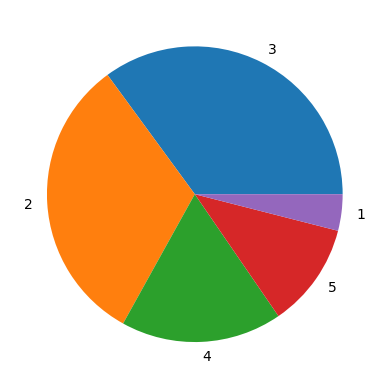

In [35]:
plt.pie(housing_data_frame.income_cat.value_counts(),labels=housing_data_frame.income_cat.value_counts().index)
plt.show()

In [32]:
housing_data_frame.income_cat.value_counts().index

CategoricalIndex([3, 2, 4, 5, 1], categories=[1, 2, 3, 4, 5], ordered=True, dtype='category', name='income_cat')

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

In [39]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [40]:
for train_ix,test_ix in split.split(housing_data_frame, housing_data_frame["income_cat"]):
    print(train_ix,test_ix)
                

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [45]:
housing_data_frame.shape

(20640, 11)

In [47]:
train_df  = housing_data_frame.loc[train_ix]

In [49]:
train_df.shape

(16512, 11)

In [50]:
test_df = housing_data_frame.loc[test_ix]

In [51]:
test_df.shape

(4128, 11)

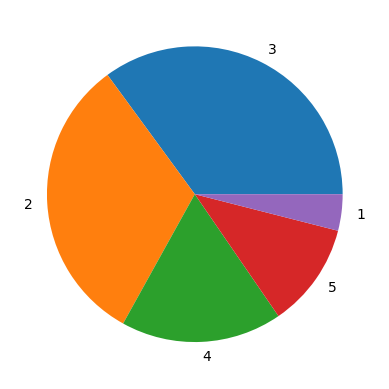

In [53]:
plt.pie(train_df.income_cat.value_counts(),labels=train_df.income_cat.value_counts().index)
plt.show()

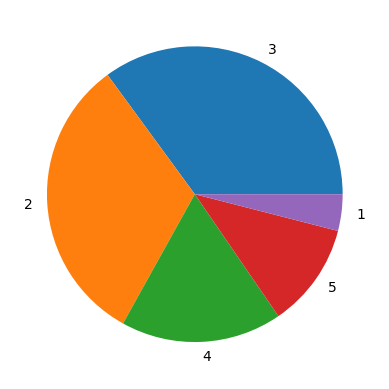

In [55]:
plt.pie(test_df.income_cat.value_counts(),labels=test_df.income_cat.value_counts().index)
plt.show()

In [56]:
housing_data_frame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [57]:
housing_data_frame.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object

In [58]:
housing_data_frame.columns,housing_data_frame.dtypes

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 longitude              float64
 latitude               float64
 housing_median_age     float64
 total_rooms            float64
 total_bedrooms         float64
 population             float64
 households             float64
 median_income          float64
 median_house_value     float64
 ocean_proximity         object
 income_cat            category
 dtype: object)

In [59]:
housing_data_frame.columns,housing_data_frame.dtypes.values

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'income_cat'],
       dtype='object'),
 array([dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'),
        dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)],
       dtype=object))

In [64]:
housing_data_frame.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True, categories_dtype=int64)],
      dtype=object)

In [72]:
data_types = list(map(lambda x: str(x).replace("dtype('","").replace("')","") , (housing_data_frame.dtypes.values)))
data_types

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'object',
 'category']

In [70]:
columns_names = housing_data_frame.columns
columns_names

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [73]:
from pyparsing import col


dict(zip(columns_names,data_types))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}